<a href="https://colab.research.google.com/github/vasthav2k/deeplearning/blob/master/WEEK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Without Validation*** 

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-05-28 13:20:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  86.0MB/s    in 1.7s    

2020-05-28 13:20:10 (86.0 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os
import zipfile

localzip='/tmp/horse-or-human.zip'
zip_ref=zipfile.ZipFile(localzip,'r')

In [0]:
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [0]:
train_horse_dir=os.path.join('/tmp/horse-or-human/horses')
train_human_dir=os.path.join('/tmp/horse-or-human/humans')

In [0]:
train_horse_names=os.listdir(train_horse_dir)
print(train_horse_names[0:10])

['horse36-8.png', 'horse38-4.png', 'horse26-0.png', 'horse50-5.png', 'horse34-9.png', 'horse29-6.png', 'horse34-8.png', 'horse02-6.png', 'horse14-2.png', 'horse16-1.png']


In [0]:
train_human_names=os.listdir(train_human_dir)

In [0]:
print(train_human_names[:10])

['human16-02.png', 'human01-15.png', 'human08-12.png', 'human13-22.png', 'human02-09.png', 'human16-14.png', 'human02-21.png', 'human01-22.png', 'human04-16.png', 'human16-03.png']


In [0]:
print('Training Horse Images:',len(train_horse_names))
print('Training Human Images:',len(train_human_names))

Training Horse Images: 500
Training Human Images: 527


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nr=4
nc=4

pic_index=0

In [0]:
fig=plt.gcf()


<Figure size 432x288 with 0 Axes>

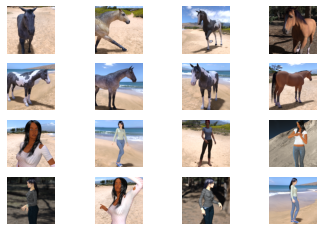

In [0]:
fig.set_size_inches(nc*4,nr*4)

pic_index+=8

next_horse=[os.path.join(train_horse_dir,fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human=[os.path.join(train_human_dir,fname) for fname in train_human_names[pic_index-8:pic_index]]

for i,img_path in enumerate(next_horse+next_human):
  sp=plt.subplot(nc,nr,i+1)
  sp.axis('Off')

  img=mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [0]:
model=Sequential([
                  Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(300,300,3)),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                  MaxPooling2D(pool_size=(2,2)),
                  Flatten(),
                  Dense(units=512,activation='relu'),
                  Dense(units='1',activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [0]:
from tensorflow.keras.optimizers import RMSprop


In [0]:
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen=ImageDataGenerator(rescale=1/255)

In [0]:
train_generator=train_datagen.flow_from_directory('/tmp/horse-or-human/',target_size=(300,300),batch_size=128,class_mode='binary')

Found 1027 images belonging to 2 classes.


In [0]:
history=model.fit(train_generator,steps_per_epoch=8,epochs=15,verbose=1)

Epoch 1/15
8/8 [==============================] - 5s 596ms/step - loss: 2.0366 - accuracy: 0.4783
Epoch 2/15
8/8 [==============================] - 5s 653ms/step - loss: 0.5616 - accuracy: 0.7442
Epoch 3/15
8/8 [==============================] - 6s 768ms/step - loss: 0.7073 - accuracy: 0.7408
Epoch 4/15
8/8 [==============================] - 5s 663ms/step - loss: 0.4852 - accuracy: 0.7864
Epoch 5/15
8/8 [==============================] - 5s 643ms/step - loss: 0.7489 - accuracy: 0.7519
Epoch 6/15
8/8 [==============================] - 5s 661ms/step - loss: 0.3005 - accuracy: 0.8821
Epoch 7/15
8/8 [==============================] - 5s 665ms/step - loss: 0.2595 - accuracy: 0.8854
Epoch 8/15
8/8 [==============================] - 5s 655ms/step - loss: 0.1704 - accuracy: 0.9321
Epoch 9/15
8/8 [==============================] - 5s 647ms/step - loss: 0.2927 - accuracy: 0.8988
Epoch 10/15
8/8 [==============================] - 6s 731ms/step - loss: 0.1132 - accuracy: 0.9600
Epoch 11/15
8/8 [==

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  img=image.load_img(path,target_size=(300,300))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)

  images=np.vstack([x])
  classes=model.predict(images,batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn,"is a human")
  else:
    print(fn,"is a horse")

MessageError: ignored

In [0]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# ***With Validation*** 

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-05-28 13:30:11--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  40.2MB/s    in 0.3s    

2020-05-28 13:30:11 (40.2 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [0]:
import os
import zipfile

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [0]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [0]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse36-8.png', 'horse38-4.png', 'horse26-0.png', 'horse50-5.png', 'horse34-9.png', 'horse29-6.png', 'horse34-8.png', 'horse02-6.png', 'horse14-2.png', 'horse16-1.png']
['human16-02.png', 'human01-15.png', 'human08-12.png', 'human13-22.png', 'human02-09.png', 'human16-14.png', 'human02-21.png', 'human01-22.png', 'human04-16.png', 'human16-03.png']
['horse4-232.png', 'horse3-326.png', 'horse5-550.png', 'horse4-588.png', 'horse1-122.png', 'horse4-043.png', 'horse2-011.png', 'horse2-596.png', 'horse4-102.png', 'horse2-383.png']
['valhuman01-00.png', 'valhuman03-03.png', 'valhuman05-10.png', 'valhuman02-10.png', 'valhuman05-05.png', 'valhuman02-06.png', 'valhuman01-22.png', 'valhuman03-05.png', 'valhuman01-04.png', 'valhuman01-12.png']


In [0]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

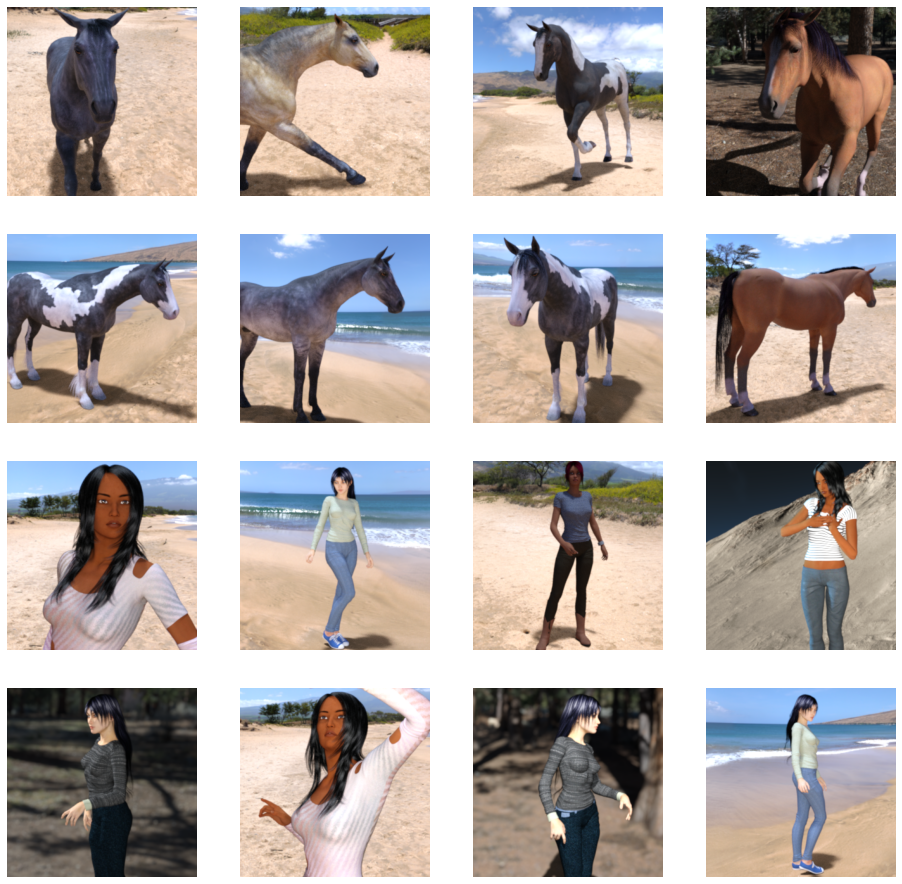

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [0]:
import tensorflow as tf

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [0]:
model=Sequential([
                  Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(300,300,3)),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                  MaxPooling2D(pool_size=(2,2)),
                  Flatten(),
                  Dense(units=512,activation='relu'),
                  Dense(units='1',activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [0]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 7s 870ms/step - loss: 3.6991 - accuracy: 0.8710 - val_loss: 0.4492 - val_accuracy: 0.8945
Epoch 2/15
8/8 [==============================] - 7s 854ms/step - loss: 0.0728 - accuracy: 0.9778 - val_loss: 1.0717 - val_accuracy: 0.8281
Epoch 3/15
8/8 [==============================] - 7s 865ms/step - loss: 0.0200 - accuracy: 0.9967 - val_loss: 1.0328 - val_accuracy: 0.8594
Epoch 4/15
8/8 [==============================] - 7s 861ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.5961 - val_accuracy: 0.8398
Epoch 5/15
8/8 [==============================] - 7s 859ms/step - loss: 0.0102 - accuracy: 0.9978 - val_loss: 1.5052 - val_accuracy: 0.8477
Epoch 6/15
8/8 [==============================] - 7s 861ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.1138 - val_accuracy: 0.8242
Epoch 7/15
8/8 [==============================] - 7s 854ms/step - loss: 4.2518e-04 - accuracy: 1.0000 - val_loss: 2.1624 - val_accuracy: 0.8281
Epoch 8/15
8/8 [

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

In [0]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')